## Visualization in Python

Data visualization is the creation and study of the visual representation of data, meaning ”information that has bee n abstracted in some schematic form, including atrributes or variables for the units of information” - Michael Friendly	(2008).	  
”Milestones in the history of thematic cartography, statistical graphics, and data visualization”  
“The great fun of information visualization is that it gives you clues to answers to questions you didn’t know you had” - Prof.Ben Schneiderman, University	of	Maryland;  
“The great use of data visualization is that it gives you clues to questions you didn’t know you had” - Saaien Tist	

![](../img/vis1.png)

Preparations

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv('http://bit.ly/airbnb_ams_dataset')

In [ ]:
data.head()

## Distribution

**Histogram**  
An histogram is an accurate graphical representation of the distribution of numerical data. It takes as input one numerical variable only. The variable is cut into several bins, and the
number of observation per bin is represented by the height of the bar. Note that the shape of the histogram can be really different following the number of bins you set. Thus, try different
values before taking any conclusion. Note that it is really close to density plot.

In [4]:
normal = np.random.normal(0,2,100)

/Users/pedrohserrano/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


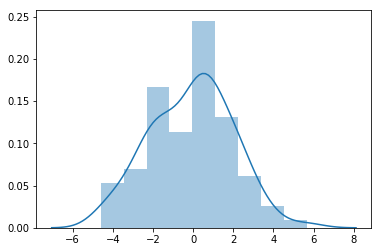

In [5]:
sns.distplot(normal)

In [ ]:
sns.distplot(normal, bins=5)

**Density**

A density plot shows the distribution of a numerical variable. It takes only set of numeric values as input. It is really close to a histogram. Since it is a really common dataviz technique, 
most of the dataviz libraries allow to draw it. Note that it is highly recommended to play with the bandwith argument in order not to miss a specific pattern in the data. Note that you can compare the
distribution of several variables plotting them on the same axis, using faceting or through a joyplot.

In [ ]:
sns.kdeplot(normal, bw=0.5)

In [ ]:
beta = np.random.normal(2,2,100)

In [ ]:
sns.kdeplot(beta, color='r', shade=True)
sns.kdeplot(normal, color='b', shade=True)

In [ ]:
sns.jointplot(beta, normal)

** Violin Plot **

Violinplots allow to visualize the distribution of a numeric variable for one or several groups. It is really close from a boxplot, but allows a deeper understanding of the density. Violins are
particularly adapted when the amount of data is huge and showing individual observations gets impossible. Seaborn is particularly adapted to realize them through its violin function.
Violinplots are a really convenient way to show the data and would probably deserve more attention compared to boxplot that can sometimes hide features of the data.

In [ ]:
#beta.append(normal)

In [ ]:
normal_df = pd.DataFrame({'value':normal,'dist':['normal']*len(normal)})

In [ ]:
beta_df = pd.DataFrame({'value':beta,'dist':['beta']*len(beta)})

In [ ]:
df = beta_df.append(normal_df)

In [ ]:
sns.violinplot( y=df["dist"], x=df["value"] )

In [ ]:
#df

** Boxplot **  
Boxplot is probably one of the most common type of graphic. It gives a nice summary of one or several numeric variables. The line that divides the box into 2 parts represents the median  
of the data. The end of the box shows the upper and lower quartiles. The extreme lines shows the highest and lowest value excluding outliers. Note that boxplot hide the number of values  
existing behind the variable. Thus, it is highly advised to print the number of observation, add unique observation with jitter or use a violinplot if you have many observations.

In [ ]:
sns.boxplot(x='dist', y='value', data=df)
sns.swarmplot(x='dist', y='value', data=df, color="grey")


### Correlation

**Scatter Plot**  
A Scatterplot displays the value of 2 sets of data on 2 dimensions. Each dot represents an observation. The position on the X (horizontal) and Y (vertical) axis represents the values of the 2 variables. It is really useful to study the relationship between both variables. It is common to provide even more information using colors or shapes (to show groups, or a third variable). It is also possible to map another variable to the size of each dot, what makes a bubble plot. If you have many dots and struggle with overplotting, consider using 2D density plot.

In [ ]:
sns.regplot(x=normal, y=beta)

In [ ]:
# Without regression fit:
#sns.regplot(normal, beta, fit_reg=False)

** Connectec scatter plot **  
A connected scatterplot is really close from a scatterplot, except that dots are linked one to each other with lines. This means that the values of your X axis must be ordered to make this type of representation useful. Thus, connected scatter plot are often used for time series where the X axis represents time. If you want to fill the area under the line you will get an area chart.

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(sorted(normal), beta, marker='o', alpha=0.4)
plt.title("A subplot with 2 lines")
# And now add something in the second part:
plt.subplot(122)
plt.plot(sorted(normal), beta, linestyle='none', marker='o', color="orange", alpha=0.3)


** Bubble Plot **  

A bubble plot is a scatterplot where a third dimension is added: the value of an additional variable is represented through the size of the dots. You need 3 numerical variables as input: one is represented by the X axis, one by the Y axis, and one by the size. Do not forget to provide a legend to make possible the link between the size and the value. Note that too many bubble make the chart hard to read, so this type of representation is usually not recommended for big amount of data. Last but not least, note that the area of the circles must be proportional to the value, not to the radius, to avoid exaggerate the variation in your data.

In [ ]:
x = np.random.rand(15)
y = x+np.random.rand(15)
z = x+np.random.rand(15)
z=z*z
 
# Change color with c and alpha. I map the color to the X axis value.
plt.scatter(x, y, s=z*2000, c=x, cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=2)
 
# Add titles (main and on axis)
plt.xlabel("the X axis")
plt.ylabel("the Y axis")
plt.title("A colored bubble plot")

** Heatmap **  
A heat map (or heatmap) is a graphical representation of data where the individual values contained in a matrix are represented as colors. It is a bit like looking a data table from above. It is really useful to display a general view of numerical data, not to extract specific data point. It is quite straight forward to make a heat map, as shown on the examples below. However be careful to understand the underlying mechanisms. You will probably need to normalise your matrix, choose a relevant colour palette, use cluster analysis and thus permute the rows and the columns of the matrix to place similar values near each other according to the clustering.

In [ ]:
df = pd.DataFrame(np.random.random((10,10)), columns=["a","b","c","d","e","f","g","h","i","j"])
sns.heatmap(df, annot=True, annot_kws={"size": 7})
#sns.plt.show()

In [ ]:
#sns.heatmap(df, linewidths=2, linecolor='yellow') Custom grid lines
#sns.heatmap(df, yticklabels=False) Remove X or Y labels
#sns.heatmap(df, cbar=False) 4/ Remove color bar
#sns.heatmap(df, xticklabels=4) Hide a few axis labels to avoid overlapping

** 2D Density Plot **  
A 2D density plot or  2D histogram is an extension of the well known histogram. It shows the distribution of values in a data set across the range of two quantitative variables. It is really useful to avoid over plotting in a scatterplot. If you have too many dots, the 2D density plot counts the number of observations within a particular area of the 2D space. This specific area can be a square or a hexagon (hexbin).

In [ ]:
df = sns.load_dataset('iris')
 
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='scatter')
sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='hex')
sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='kde')

** Correlogram **  
A correlogram or correlation matrix allows to analyse the relationship between each pair of numerical variables of a matrix. The correlation between each pair of variable is visualise through a scatterplot, or a symbol that represents the correlation (bubble, line, number..). The diagonal represents the distribution of each variable, using an histogram or a density plot. This technique is widely used for exploratory analysis since it avoids to make hundreds of plots to observe a matrix. The seaborn library allows to make them really easily through the pairplot function and this page gives a few examples.

In [ ]:
sns.pairplot(df)

## Ranking

** Barplot **  
A barplot (or barchart) is one of the most common type of plot. It shows the relationship between a numerical variable and a categorical variable. For example, you can display the height of several individuals using bar chart. Barcharts are often confounded with histograms, which is highly different. (It has only a numerical variable as input and shows its distribution). A common mistake is to use barplots to represent the average value of each group. If you have several values per group, showing only the average dissimulate a part of the information. In this case, consider doing a boxplot or a violinplot. At least, you should show the number of observation per group and the confidence interval of each group. Last tip: ordering the bars often makes the chart more informative.

In [ ]:
height = [3, 12, 5, 18, 45]
bars = ('A', 'B', 'C', 'D', 'E')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)


** Boxplot ordered **

In [ ]:
# Usual boxplot
ax = sns.boxplot(x='species', y='sepal_length', data=df)
 
# Add jitter with the swarmplot function.
ax = sns.swarmplot(x='species', y='sepal_length', data=df, color="grey")


** Parallel Plot **  

Parallel plot or Parallel Coordinates Plots allow to compare the feature of several individual observations on a set of numerical variables. Each vertical bar represents a variable and usually has its own scale. (The units can even be different!). Values are then plotted as series of lines connected across each axis. Playing with colour can then be used to represent different groups of individual, or highlight a specific one. That should allow to detect interesting patterns! Don’t forget to play with the order of your axis. Indeed, parallel plot mainly allows to compare variations of adjacent axis, so changing the order can lead to the discovering of new patterns.

In [ ]:
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(df, 'species', colormap=plt.get_cmap("Set2"))

** Lolipop plot **   
A lollipop plot is an hybrid between a scatter plot and a barplot. It shows the relationship between a numerical variable and another variable, numerical OR categorical. In this section we will consider Cleveland dot plots as well, allowing to compare the values of 2 numerical values for each group. Note that lollipop plot can be done using the specific stem() function, or using the hline() and vline() functions.

In [ ]:
df = pd.DataFrame({'group':list(map(chr, range(65, 85))), 'values':np.random.uniform(size=20) })
 
# Reorder it following the values:
ordered_df = df.sort_values(by='values')
my_range=range(1,len(df.index)+1)
 
# The vertival plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['values'], color='skyblue')
plt.plot(ordered_df['values'], my_range, "o")
 
# Add titles and axis names
plt.yticks(my_range, ordered_df['group'])
plt.title("A vertical lolipop plot", loc='left')
plt.xlabel('Value of the variable')
plt.ylabel('Group')


In [ ]:
value1=np.random.uniform(size=20)
value2=value1+np.random.uniform(size=20)/4
df = pd.DataFrame({'group':list(map(chr, range(65, 85))), 'value1':value1 , 'value2':value2 })
 
# Reorder it following the values of the first value:
ordered_df = df.sort_values(by='value1')
my_range=range(1,len(df.index)+1)
 
# The vertical plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
import seaborn as sns
plt.hlines(y=my_range, xmin=ordered_df['value1'], xmax=ordered_df['value2'], color='grey', alpha=0.4)
plt.scatter(ordered_df['value1'], my_range, color='skyblue', alpha=1, label='value1')
plt.scatter(ordered_df['value2'], my_range, color='green', alpha=0.4 , label='value2')
plt.legend()
 
# Add title and axis names
plt.yticks(my_range, ordered_df['group'])
plt.title("Comparison of the value 1 and the value 2", loc='left')
plt.xlabel('Value of the variables')
plt.ylabel('Group')


** Word cloud **  
A Wordcloud (or Tag cloud) is a visual representation of text data. It displays a list of words, the importance of each beeing shown with font size or color. This format is useful for quickly perceiving the most prominent terms. Python is totally adapted to draw this kind of representation.

In [ ]:
from wordcloud import WordCloud
# Create a list of word
text=("Python Python Python Matplotlib Matplotlib Seaborn Network Plot Violin Chart Pandas Datascience Wordcloud Spider Radar Parrallel Alpha Color Brewer Density Scatter Barplot Barplot Boxplot Violinplot Treemap Stacked Area Chart Chart Visualization Dataviz Donut Pie Time-Series Wordcloud Wordcloud Sankey Bubble")
wordcloud = WordCloud(width=480, height=480, colormap="Blues").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


** Radar Chart **  

A Radar chart or Spider plot or Polar chart or Web chart allows to study the feature of one or several individuals for several numerical variables. It is possible to represent several individuals on the same graph but be careful, the chart can quickly become unreadable. Instead, try to use faceting: display as many chart as the number of individual, it makes easy to compare the shape of each. Python does not have any built in function to create radar chart. Thus, you have to be courageous and dive into the code. Note that radar chart can make hard to read values, so often a simple marplot or parallel plot is advised.§

In [ ]:
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.1)


## Part of a whole

** STACKED BARPLOT **  

This section display grouped barcharts, stacked barcharts and percent stacked barcharts. This 3 types of barplot variation have the same objective. It displays a numerical value for several entities, organised into groups and subgroups. A grouped barplot display the subgroups one beside each other, whereas the stacked ones display them on top of each other. The percent variation normalise the data to make in sort the value of each group is 100. It allows the compare the importance of each subgroups in each group more effectively. Note that faceting can be a good alternative

In [ ]:
r = [0,1,2,3,4]
raw_data = {'greenBars': [20, 1.5, 7, 10, 5], 'orangeBars': [5, 15, 5, 10, 15],'blueBars': [2, 15, 18, 5, 10]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]
 
# plot
barWidth = 0.85
names = ('A','B','C','D','E')
# Create green Bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth)
# Create blue Bars
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("group")
 
# Show graphic
plt.show()


** Venn Diagram ** 
A Venn diagram (also called primary diagram, set diagram or logic diagram) is a diagram that shows all possible logical relations between a finite collection of different sets. Each set is represented by a circle. The circle size represents the importance of the group. The groups are usually overlapping: the size of the overlap represents the intersection between both groups. It is unadvised to make Venn diagram with more than 3 groups because it would become hard to read. In python, Venn diagram are realised using the venn2 and venn3 function of the matplotlib library according to the number of group you have. See here for module installation

In [ ]:
#!pip install matplotlib_venn

In [ ]:
from matplotlib_venn import venn2
 
# First way to call the 2 group Venn diagram:
venn2(subsets = (10, 5, 2), set_labels = ('Group A', 'Group B'))
plt.show()
 
# Second way
venn2([set(['A', 'B', 'C', 'D']), set(['D', 'E', 'F'])])
plt.show()


** DENDROGRAM **  

A dendrogram or tree diagram allows to illustrate the hierarchical organisation of several entities. For example, we often use it to make family trees. It is constituted of a root node, which give birth to several nodes that ends by giving leaf nodes (the

bottom of the tree). Dendrogram can be made with 2 types of dataset. i/ a numeric matrix where several variables describe the features of individuals. We can then calculate the distance between individuals and clustering them. ii/ A hierarchical

dataset where  the relationship between entities is provided directly. These 2 cases are described below. Note that for clusterization, it is a good practice to provide the corresponding heat map that illustrates the structure.

In [ ]:
url = 'https://python-graph-gallery.com/wp-content/uploads/mtcars.csv'
df = pd.read_csv(url)
df = df.set_index('model')
df
 
# Prepare a vector of color mapped to the 'cyl' column
my_palette = dict(zip(df.cyl.unique(), ["orange","yellow","brown"]))
row_colors = df.cyl.map(my_palette)
 
# plot
sns.clustermap(df, metric="correlation", method="single", cmap="Blues", standard_scale=1, row_colors=row_colors)


## Evolution

** LINE CHART **  
A line chart or line graph is a type of chart which displays information as a series of data points called ‘markers’ connected by straight line segments. It is a basic type of  chart common in

many fields. It is similar to a scatter plot except that the measurement points are ordered (typically by their x-axis value) and joined with straight line segments. A line chart is often used to

visualize a trend in data over intervals of time – a time series – thus the line is often drawn chronologically. In these cases they are known as run charts

In [ ]:
values=np.cumsum(np.random.randn(1000,1))
 
# use the plot function
plt.plot(values)


In [ ]:
df=pd.DataFrame({'xvalues': range(1,101), 'yvalues': np.random.randn(100) })
 
# plot
plt.plot( 'xvalues', 'yvalues', data=df)
plt.show()

** AREA PLOT **  

An area chart is really similar to a line chart, except that the area between the x axis and the line is filled in with color or shading. It represents the evolution of a numerical variable following another numerical variable. If you

want to represent this evolution for several groups in the same time, you are probably interested by stacked area chart, where every groups are displayed one of top of each other. Note that an interesting alternative is probably

to use faceting. In python, area chart can be done using the fillbetween function of matplotlib. The stackplot function could work as well, but it is more adapted for stacked area charts.

In [ ]:
x=range(1,15)
y=[1,4,6,8,4,5,3,2,4,1,5,6,8,7]
 
# Change the color and its transparency
plt.fill_between( x, y, color="skyblue", alpha=0.4)
plt.show()
 
# Same, but add a stronger line on top (edge)
plt.fill_between( x, y, color="skyblue", alpha=0.2)


** STACKED AREA PLOT ** m


A stacked area chart is the extension of a basic area chart to display the evolution of the value of several groups on the same graphic. The values of each group are displayed on top of each other. It allows to check on the

same figure the evolution of both the total of a numeric variable, and the importance of each group. If only the relative importance of each group interests you, you should probably draw a percent stacked area chart. Note that

this chart becomes hard to read if too many groups are displayed and if the patterns are really different between groups. In this case, think about using faceting instead.§m

In [ ]:
# Your x and y axis
x=range(1,6)
y=[ [10,4,6,5,3], [12,2,7,10,1], [8,18,5,7,6] ]
 
# use a known color palette (see..)
pal = sns.color_palette("Set1")
plt.stackplot(x,y, labels=['A','B','C'], colors=pal, alpha=0.4 )
plt.legend(loc='upper right')
plt.show()
 
# create your palette
pal = ["#9b59b6", "#e74c3c", "#34495e", "#2ecc71"]
plt.stackplot(x,y, labels=['A','B','C'], colors=pal, alpha=0.4 )
plt.legend(loc='upper right')
